In [1]:
import os
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from ParseNHANES import ParseNHANES, Component

In [2]:
def multi_merge(data_frames):
    return reduce(lambda left, right: pd.merge(left, right, on=['SEQN', 'year'], how='outer'), data_frames)

In [3]:
nhanes = ParseNHANES(data_dir='data', out_dir='data')

# Demographics

In [4]:
cols_demo = ['RIDAGEYR', 'RIDRETH1', 'INDFMPIR', 'RIAGENDR']

In [5]:
df_demo, meta_demo = nhanes.get_component(Component.DEMOGRAPHICS, columns=cols_demo)

2020-08-26 19:55:46 [ParseNHANES] INFO: Getting Component.DEMOGRAPHICS


In [6]:
meta_demo # these are the columns in the df

{'RIDAGEYR': 'Age in years at screening ',
 'RIDRETH1': 'Race/Hispanic origin',
 'INDFMPIR': 'Ratio of family income to poverty',
 'RIAGENDR': 'Gender'}

In [7]:
df_demo.head()

,RIDAGEYR,RIDRETH1,INDFMPIR,RIAGENDR,year,SEQN
0,2.0,4.0,0.86,2.0,1999-2000,1
1,77.0,3.0,5.00,1.0,1999-2000,2
2,10.0,3.0,1.47,2.0,1999-2000,3
3,1.0,4.0,0.57,1.0,1999-2000,4
4,49.0,3.0,5.00,1.0,1999-2000,5


In [8]:
df_demo.describe()

,RIDAGEYR,RIDRETH1,INDFMPIR,RIAGENDR,SEQN
count,1.013160e+05,101316.000000,9.212000e+04,101316.000000,101316.000000
mean,3.112829e+01,2.895831,2.272155e+00,1.507551,51134.397193
std,2.494308e+01,1.251255,1.601358e+00,0.499945,29836.192620
min,5.397605e-79,1.000000,5.397605e-79,1.000000,1.000000
25%,1.000000e+01,2.000000,9.400000e-01,1.000000,25329.750000
50%,2.400000e+01,3.000000,1.790000e+00,2.000000,50658.500000
75%,5.200000e+01,4.000000,3.570000e+00,2.000000,77627.250000
max,8.500000e+01,5.000000,5.000000e+00,2.000000,102956.000000


In [9]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101316 entries, 0 to 9253
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RIDAGEYR  101316 non-null  float64
 1   RIDRETH1  101316 non-null  float64
 2   INDFMPIR  92120 non-null   float64
 3   RIAGENDR  101316 non-null  float64
 4   year      101316 non-null  object 
 5   SEQN      101316 non-null  int32  
dtypes: float64(4), int32(1), object(1)
memory usage: 5.0+ MB


In [10]:
df_demo['year'].value_counts().sort_index()
# approx 10,000 people per year

1999-2000     9965
2001-2002    11039
2003-2004    10122
2005-2006    10348
2007-2008    10149
2009-2010    10537
2011-2012     9756
2013-2014    10175
2015-2016     9971
2017-2018     9254
Name: year, dtype: int64

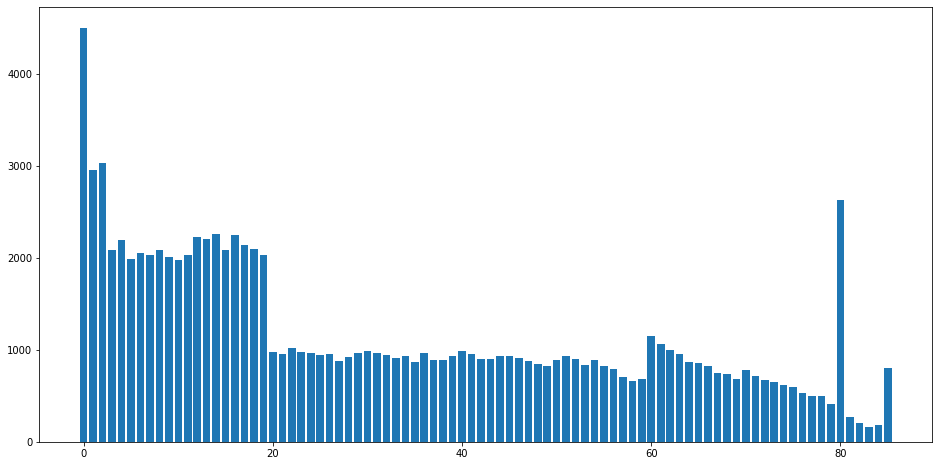

In [11]:
ages = df_demo['RIDAGEYR'].astype(int).value_counts().sort_index()

# plot ages of all people
fig = plt.figure(figsize=(16, 8))
plt.bar(ages.index, ages)
plt.show()  # lots of 80 year olds??

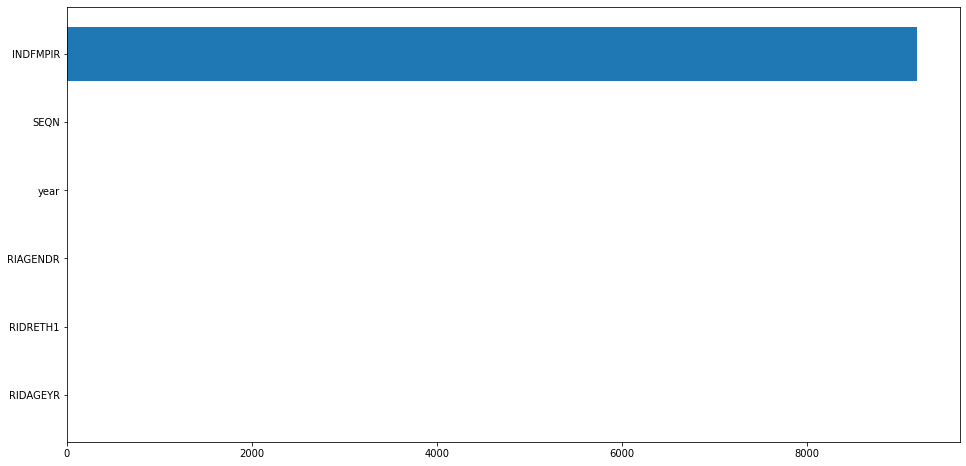

In [12]:
na_count = df_demo.isna().sum().sort_values()

# plot ages of all people
fig = plt.figure(figsize=(16, 8))
plt.barh(na_count.index, na_count)
plt.show()  # lots of 80 year olds??

In [13]:
# 1: male
# 2: female
df_demo['RIAGENDR'].value_counts()

2.0    51423
1.0    49893
Name: RIAGENDR, dtype: int64

# Questionaire

In [14]:
cols_ques1 = ['MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F']
cols_ques2 = ['SMQ040']
cols_ques3 = ['DIQ010']

In [15]:
df_ques1, meta_ques1 = nhanes.get_component(Component.QUESTIONAIRE, expr=r'MCQ(|_[A-Z]).XPT', columns=cols_ques1)

2020-08-26 19:55:49 [ParseNHANES] INFO: Getting Component.QUESTIONAIRE


In [16]:
df_ques2, meta_ques2 = nhanes.get_component(Component.QUESTIONAIRE, expr=r'SMQ(|_[A-Z]).XPT', columns=cols_ques2)

2020-08-26 19:55:54 [ParseNHANES] INFO: Getting Component.QUESTIONAIRE


In [17]:
df_ques3, meta_ques3 = nhanes.get_component(Component.QUESTIONAIRE, expr=r'DIQ(|_[A-Z]).XPT', columns=cols_ques3)

2020-08-26 19:55:55 [ParseNHANES] INFO: Getting Component.QUESTIONAIRE


In [18]:
df_ques4, meta_ques4 = nhanes.get_component(Component.QUESTIONAIRE, expr=r'ALQ(|_[A-Z]).XPT', columns=['ALQ120Q'])

2020-08-26 19:55:57 [ParseNHANES] INFO: Getting Component.QUESTIONAIRE


In [19]:
meta_ques = {**meta_ques1, **meta_ques2, **meta_ques3, **meta_ques4}
meta_ques

{'MCQ160B': 'Ever told had congestive heart failure',
 'MCQ160C': 'Ever told you had coronary heart disease',
 'MCQ160D': 'Ever told you had angina/angina pectoris',
 'MCQ160E': 'Ever told you had heart attack',
 'MCQ160F': 'Ever told you had a stroke',
 'SMQ040': 'Do you now smoke cigarettes?',
 'DIQ010': 'Doctor told you have diabetes',
 'ALQ120Q': 'How often drink alcohol over past 12 mos'}

In [20]:
df_ques1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96811 entries, 0 to 8896
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MCQ160B  55078 non-null  float64
 1   MCQ160C  55078 non-null  float64
 2   MCQ160D  55078 non-null  float64
 3   MCQ160E  55078 non-null  float64
 4   MCQ160F  55078 non-null  float64
 5   year     96811 non-null  object 
 6   SEQN     96811 non-null  int32  
dtypes: float64(5), int32(1), object(1)
memory usage: 5.5+ MB


In [21]:
df_ques = multi_merge(data_frames=[df_ques1, df_ques2, df_ques3, df_ques4])
df_ques.head()

,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,year,SEQN,SMQ040,DIQ010,ALQ120Q
0,NaN,NaN,NaN,NaN,NaN,1999-2000,1,NaN,2.0,NaN
1,2.0,2.0,2.0,2.0,2.0,1999-2000,2,NaN,2.0,24.0
2,NaN,NaN,NaN,NaN,NaN,1999-2000,3,NaN,2.0,NaN
3,NaN,NaN,NaN,NaN,NaN,1999-2000,4,NaN,2.0,NaN
4,2.0,2.0,2.0,2.0,2.0,1999-2000,5,3.0,2.0,4.0


In [22]:
df_na = df_ques.isna()
df_na['year'] = df_ques['year']
df_na_year = df_na.groupby('year').sum()
df_na_year.T

year,1999-2000,2001-2002,2003-2004,2005-2006,2007-2008,2009-2010,2011-2012,2013-2014,2015-2016,2017-2018
MCQ160B,4613,5060,4605,4843,3731,3891,3805,4001,3856,3328
MCQ160C,4613,5060,4605,4843,3731,3891,3805,4001,3856,3328
MCQ160D,4613,5060,4605,4843,3731,3891,3805,4001,3856,3328
MCQ160E,4613,5060,4605,4843,3731,3891,3805,4001,3856,3328
MCQ160F,4613,5060,4605,4843,3731,3891,3805,4001,3856,3328
SEQN,0,0,0,0,0,0,0,0,0,0
SMQ040,7194,7874,7149,7474,6864,7243,6995,7191,7153,6538
DIQ010,5,2,0,0,0,0,1,1,0,0
ALQ120Q,5974,6574,5966,6075,5232,5457,5176,5291,5351,8897


<AxesSubplot:>

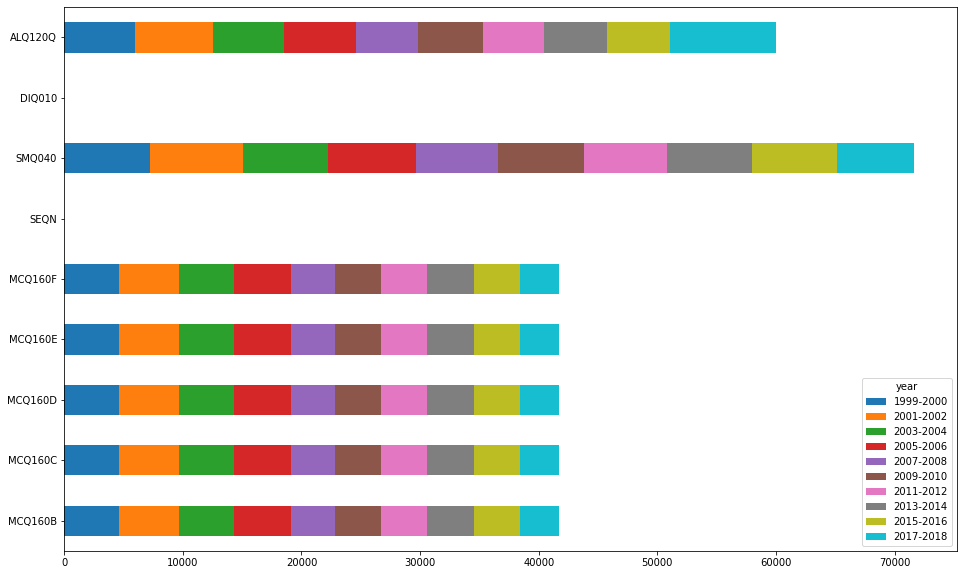

In [23]:
df_na_year.T.plot.barh(stacked=True, figsize=(16, 10))

In [24]:
df_ques.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96811 entries, 0 to 96810
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MCQ160B  55078 non-null  float64
 1   MCQ160C  55078 non-null  float64
 2   MCQ160D  55078 non-null  float64
 3   MCQ160E  55078 non-null  float64
 4   MCQ160F  55078 non-null  float64
 5   year     96811 non-null  object 
 6   SEQN     96811 non-null  int32  
 7   SMQ040   25136 non-null  float64
 8   DIQ010   96802 non-null  float64
 9   ALQ120Q  36818 non-null  float64
dtypes: float64(8), int32(1), object(1)
memory usage: 7.8+ MB


In [25]:
df_ques['SEQN'].nunique()

96811

# Laboratory

In [26]:
cols_labo = ['LBXSNASI', 'LBXSCH']

In [27]:
df_labo, meta_labo = nhanes.get_component(Component.LABORATORY, expr=r'(BIOPRO_[A-Z]|L40_.*|LAB18).XPT', columns=cols_labo)

2020-08-26 19:55:58 [ParseNHANES] INFO: Getting Component.LABORATORY


In [28]:
meta_labo

{'LBXSNASI': 'Sodium (mmol/L)',
 'LBXSCH': 'Cholesterol, refrigerated serum (mg/dL)'}

In [29]:
df_labo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69678 entries, 0 to 6400
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LBXSNASI  63969 non-null  float64
 1   LBXSCH    63965 non-null  float64
 2   year      69678 non-null  object 
 3   SEQN      69678 non-null  int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 2.4+ MB


In [30]:
df_labo.head()

,LBXSNASI,LBXSCH,year,SEQN
0,144.1,203.0,1999-2000,2
1,137.5,277.0,1999-2000,5
2,139.9,148.0,1999-2000,6
3,143.2,244.0,1999-2000,7
4,136.8,157.0,1999-2000,8


# Examination

In [31]:
cols_exam1 = ['BPXPLS', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BPXSY3', 'BPXDI3', 'BPXSY4', 'BPXDI4']
cols_exam2 = ['BMXWT', 'BMXHT', 'BMXWAIST', 'BMXARMC']

In [32]:
df_exam1, meta_exam1 = nhanes.get_component(Component.EXAMINATION, expr=r'BPX(|_[A-Z]).XPT', columns=cols_exam1)

2020-08-26 19:55:59 [ParseNHANES] INFO: Getting Component.EXAMINATION


In [33]:
df_exam2, meta_exam2 = nhanes.get_component(Component.EXAMINATION, expr=r'BMX(|_[A-Z]).XPT', columns=cols_exam2)

2020-08-26 19:56:00 [ParseNHANES] INFO: Getting Component.EXAMINATION


In [34]:
meta_exam = {**meta_exam1, **meta_exam2}
meta_exam

{'BPXPLS': '60 sec. pulse (30 sec. pulse * 2)',
 'BPXSY1': 'Systolic: Blood pres (1st rdg) mm Hg',
 'BPXDI1': 'Diastolic: Blood pres (1st rdg) mm Hg',
 'BPXSY2': 'Systolic: Blood pres (2nd rdg) mm Hg',
 'BPXDI2': 'Diastolic: Blood pres (2nd rdg) mm Hg',
 'BPXSY3': 'Systolic: Blood pres (3rd rdg) mm Hg',
 'BPXDI3': 'Diastolic: Blood pres (3rd rdg) mm Hg',
 'BPXSY4': 'Systolic: Blood pres (4th rdg) mm Hg',
 'BPXDI4': 'Diastolic: Blood pres (4th rdg) mm Hg',
 'BMXWT': 'Weight (kg)',
 'BMXHT': 'Standing Height (cm)',
 'BMXWAIST': 'Waist Circumference (cm)',
 'BMXARMC': 'Arm Circumference (cm)'}

In [35]:
df_exam = multi_merge([df_exam1, df_exam2])

In [36]:
df_exam.head()

,BPXPLS,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BPXSY3,BPXDI3,BPXSY4,BPXDI4,year,SEQN,BMXWT,BMXHT,BMXWAIST,BMXARMC
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-2000,1,12.5,91.6,45.7,15.2
1,68.0,106.0,58.0,98.0,56.0,98.0,56.0,NaN,NaN,1999-2000,2,75.4,174.0,98.0,29.8
2,104.0,110.0,60.0,104.0,64.0,112.0,62.0,NaN,NaN,1999-2000,3,32.9,136.6,64.7,19.7
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-2000,4,13.3,NaN,NaN,16.4
4,66.0,122.0,82.0,122.0,84.0,122.0,82.0,NaN,NaN,1999-2000,5,92.5,178.3,99.9,35.8


In [37]:
df_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96766 entries, 0 to 96765
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BPXPLS    73876 non-null  float64
 1   BPXSY1    68576 non-null  float64
 2   BPXDI1    68576 non-null  float64
 3   BPXSY2    67934 non-null  float64
 4   BPXDI2    67934 non-null  float64
 5   BPXSY3    67328 non-null  float64
 6   BPXDI3    67327 non-null  float64
 7   BPXSY4    8466 non-null   float64
 8   BPXDI4    8466 non-null   float64
 9   year      96766 non-null  object 
 10  SEQN      96766 non-null  int32  
 11  BMXWT     95182 non-null  float64
 12  BMXHT     88239 non-null  float64
 13  BMXWAIST  84699 non-null  float64
 14  BMXARMC   91790 non-null  float64
dtypes: float64(13), int32(1), object(1)
memory usage: 11.4+ MB


# Dietery

??

# Merge Components

In [38]:
df_merged = multi_merge(data_frames=[df_demo, df_exam, df_ques, df_labo])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101862 entries, 0 to 101861
Data columns (total 29 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   RIDAGEYR  101862 non-null  float64
 1   RIDRETH1  101862 non-null  float64
 2   INDFMPIR  92636 non-null   float64
 3   RIAGENDR  101862 non-null  float64
 4   year      101862 non-null  object 
 5   SEQN      101862 non-null  int32  
 6   BPXPLS    74418 non-null   float64
 7   BPXSY1    69081 non-null   float64
 8   BPXDI1    69081 non-null   float64
 9   BPXSY2    68425 non-null   float64
 10  BPXDI2    68425 non-null   float64
 11  BPXSY3    67802 non-null   float64
 12  BPXDI3    67801 non-null   float64
 13  BPXSY4    8568 non-null    float64
 14  BPXDI4    8568 non-null    float64
 15  BMXWT     95718 non-null   float64
 16  BMXHT     88783 non-null   float64
 17  BMXWAIST  85237 non-null   float64
 18  BMXARMC   92332 non-null   float64
 19  MCQ160B   55529 non-null   float64
 20  MCQ1

In [39]:
df_merged.set_index('SEQN', inplace=True)

In [41]:
# Replace numeric categorical values with text
df_merged['SMQ040'].replace({1: 'Every day',
                             2: 'Some days',
                             3: 'Not at all',
                             7: 'Refused',
                             9: "Don't know"}, inplace=True)
df_merged['RIDRETH1'].replace({1: "Mexican American",
                               2: "Other Hispanic",
                               3: "Non-Hispanic White",
                               4: "Non-Hispanic Black",
                               5: "Other Race - Including Multi-Racial"}, inplace=True)

df_merged['RIAGENDR'].replace({1: "Male", 2: "Female"}, inplace=True)
df_merged['MCQ160B'].replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't know"}, inplace=True)
df_merged['MCQ160F'].replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't know"}, inplace=True)
df_merged['MCQ160D'].replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't know"}, inplace=True)
df_merged['MCQ160C'].replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't know"}, inplace=True)
df_merged['MCQ160E'].replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't know"}, inplace=True)
df_merged['DIQ010'].replace({1: "Yes", 2: "No", 3: "Borderline", 7: "Refused", 9: "Don't know"}, inplace=True)

In [42]:
cols_BPXSY = ['BPXSY' + str(x) for x in range(1, 5)]
cols_BPXDI = ['BPXDI' + str(x) for x in range(1, 5)]
cols_BPXDI + cols_BPXSY

['BPXDI1',
 'BPXDI2',
 'BPXDI3',
 'BPXDI4',
 'BPXSY1',
 'BPXSY2',
 'BPXSY3',
 'BPXSY4']

In [43]:
def average_blood_pressure(row, typ):
    if typ.lower() == 'systolic':
        cols = cols_BPXSY
    elif typ.lower() == 'diastolic':
        cols = cols_BPXDI
    else:
        raise ValueError()

    return row[cols].mean()

In [44]:
df_merged['avg_systolic_blood_pres'] = df_merged.apply(lambda row: average_blood_pressure(row, 'Systolic'), axis=1)
df_merged['avg_diastolic_blood_pres'] = df_merged.apply(lambda row: average_blood_pressure(row, 'Diastolic'), axis=1)

In [45]:
cols_drop = cols_BPXSY + cols_BPXDI
df_merged.drop(labels=cols_drop, axis=1, inplace=True)

In [46]:
df_merged.head()

,RIDAGEYR,RIDRETH1,INDFMPIR,RIAGENDR,year,BPXPLS,BMXWT,BMXHT,BMXWAIST,BMXARMC,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,SMQ040,DIQ010,ALQ120Q,LBXSNASI,LBXSCH,avg_systolic_blood_pres,avg_diastolic_blood_pres
SEQN,,,,,,,,,,,,,,,,,,,,,,
1,2.0,Non-Hispanic Black,0.86,Female,1999-2000,NaN,12.5,91.6,45.7,15.2,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
2,77.0,Non-Hispanic White,5.00,Male,1999-2000,68.0,75.4,174.0,98.0,29.8,No,No,No,No,No,NaN,No,24.0,144.1,203.0,100.666667,56.666667
3,10.0,Non-Hispanic White,1.47,Female,1999-2000,104.0,32.9,136.6,64.7,19.7,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,108.666667,62.000000
4,1.0,Non-Hispanic Black,0.57,Male,1999-2000,NaN,13.3,NaN,NaN,16.4,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN
5,49.0,Non-Hispanic White,5.00,Male,1999-2000,66.0,92.5,178.3,99.9,35.8,No,No,No,No,No,Not at all,No,4.0,137.5,277.0,122.000000,82.666667


In [47]:
df_na = df_merged.isna()
df_na['year'] = df_merged['year']
df_na_year = df_na.groupby('year').sum()
df_na_year

,RIDAGEYR,RIDRETH1,INDFMPIR,RIAGENDR,BPXPLS,BMXWT,BMXHT,BMXWAIST,BMXARMC,MCQ160B,MCQ160C,MCQ160D,MCQ160E,MCQ160F,SMQ040,DIQ010,ALQ120Q,LBXSNASI,LBXSCH,avg_systolic_blood_pres,avg_diastolic_blood_pres
year,,,,,,,,,,,,,,,,,,,,,
1999-2000,0,0,1483,0,2712,768,1501,1681,980,5085,5085,5085,5085,5085,7666,477,6446,3735,3733,2750,2750
2001-2002,0,0,824,0,3146,1224,1678,1991,1175,5724,5724,5724,5724,5724,8769,571,7301,4694,4694,3207,3207
2003-2004,0,0,587,0,2761,593,1432,1725,935,5082,5082,5082,5082,5082,7626,477,6443,3631,3630,2908,2908
2005-2006,0,0,534,0,2907,501,1386,1676,854,5369,5369,5369,5369,5369,8000,526,6601,3914,3915,2989,2989
2007-2008,0,0,894,0,2788,518,1276,1611,868,4214,4214,4214,4214,4214,7347,483,5715,3774,3774,2799,2799
2009-2010,0,0,996,0,2701,375,1117,1564,838,4319,4319,4319,4319,4319,7671,428,5885,3677,3677,2719,2719
2011-2012,0,0,840,0,2696,513,1141,1552,930,4197,4197,4197,4197,4197,7387,393,5568,3782,3782,2701,2701
2013-2014,0,0,785,0,2626,452,1108,1514,874,4406,4406,4406,4406,4406,7596,406,5696,3622,3624,2644,2644
2015-2016,0,0,1052,0,2595,526,1202,1658,995,4252,4252,4252,4252,4252,7549,396,5747,3714,3717,2608,2608


In [48]:
df_merged.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15881 entries, 5 to 93685
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RIDAGEYR                  15881 non-null  float64
 1   RIDRETH1                  15881 non-null  object 
 2   INDFMPIR                  15881 non-null  float64
 3   RIAGENDR                  15881 non-null  object 
 4   year                      15881 non-null  object 
 5   BPXPLS                    15881 non-null  float64
 6   BMXWT                     15881 non-null  float64
 7   BMXHT                     15881 non-null  float64
 8   BMXWAIST                  15881 non-null  float64
 9   BMXARMC                   15881 non-null  float64
 10  MCQ160B                   15881 non-null  object 
 11  MCQ160C                   15881 non-null  object 
 12  MCQ160D                   15881 non-null  object 
 13  MCQ160E                   15881 non-null  object 
 14  MCQ160

In [49]:
meta = {**meta_demo, **meta_ques, **meta_exam, **meta_labo}
meta_del = {k: v for k, v in meta.items() if k in df_merged.columns}
meta_del

{'RIDAGEYR': 'Age in years at screening ',
 'RIDRETH1': 'Race/Hispanic origin',
 'INDFMPIR': 'Ratio of family income to poverty',
 'RIAGENDR': 'Gender',
 'MCQ160B': 'Ever told had congestive heart failure',
 'MCQ160C': 'Ever told you had coronary heart disease',
 'MCQ160D': 'Ever told you had angina/angina pectoris',
 'MCQ160E': 'Ever told you had heart attack',
 'MCQ160F': 'Ever told you had a stroke',
 'SMQ040': 'Do you now smoke cigarettes?',
 'DIQ010': 'Doctor told you have diabetes',
 'ALQ120Q': 'How often drink alcohol over past 12 mos',
 'BPXPLS': '60 sec. pulse (30 sec. pulse * 2)',
 'BMXWT': 'Weight (kg)',
 'BMXHT': 'Standing Height (cm)',
 'BMXWAIST': 'Waist Circumference (cm)',
 'BMXARMC': 'Arm Circumference (cm)',
 'LBXSNASI': 'Sodium (mmol/L)',
 'LBXSCH': 'Cholesterol, refrigerated serum (mg/dL)'}

In [50]:
df_merged.rename(columns=meta_del, inplace=True)
df_merged.head().T

SEQN,1,2,3,4,5
Age in years at screening,2,77,10,1,49
Race/Hispanic origin,Non-Hispanic Black,Non-Hispanic White,Non-Hispanic White,Non-Hispanic Black,Non-Hispanic White
Ratio of family income to poverty,0.86,5,1.47,0.57,5
Gender,Female,Male,Female,Male,Male
year,1999-2000,1999-2000,1999-2000,1999-2000,1999-2000
60 sec. pulse (30 sec. pulse * 2),NaN,68,104,NaN,66
Weight (kg),12.5,75.4,32.9,13.3,92.5
Standing Height (cm),91.6,174,136.6,NaN,178.3
Waist Circumference (cm),45.7,98,64.7,NaN,99.9
Arm Circumference (cm),15.2,29.8,19.7,16.4,35.8


In [51]:
json_file = 'data/merged.JSON'
pkl_file = 'data/merged.pkl'

nhanes.export_json(meta_del, json_file)
nhanes.export_pkl(df_merged.dropna(), pkl_file)